
# Clasificador basado en instancias (KNN)

Vamos a volver a trabajar con el dataset "fashion-mnist" (https://github.com/zalandoresearch/fashion-mnist). 


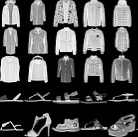

Este consta de 70000 imágenes de 28x28 píxeles en escala de grises divididas en 10 clases: 

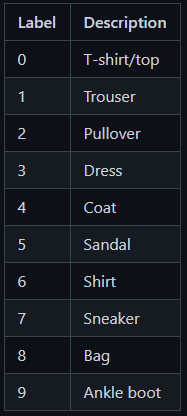

Pasos a seguir:
---

* Cargar el dataset

  El dataset está precargado en un módulo de la librería Keras, lo cargamos mediante le siguiente código:

  ```
  from keras.datasets import mnist,fashion_mnist

  (X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()
  ```
  
* Preparar los datos para el modelo

* Predecir imagenes en el test, comparar con la predicción con el label real y entender el motivo de la clasificación mirando los K samples más cercanos.

# Cargamos el dataset

In [ ]:
# Cargamos las librerías típicas de python
import matplotlib.pyplot as plt # para plotear
import numpy as np              # numpy para los arrays
import seaborn as sb            # seaborn para plotear más lindo

# Cargamos un módulo de la librería de Tensorflow que contiene el dataset fashion-mnist
from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# defino un vector de categorías donde el índice de cada elemento corresponde a la categoría asociada
categories = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step



Veamos cómo se ven algunas de las imágenes y qué etiquetas les corresponden.

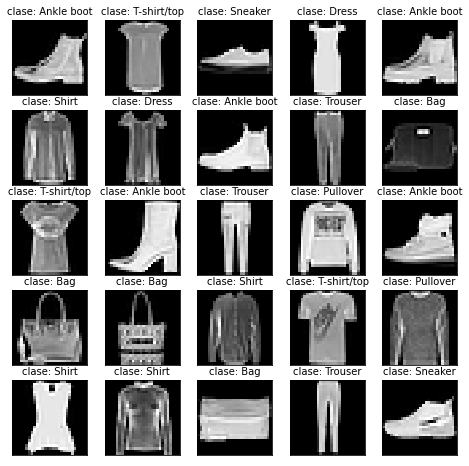

In [ ]:
# Ploteo 25 imagenes al azar del set de entrenamiento con sus respectivas clases
fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(25):
    j = np.random.randint(0, len(X_train_raw)) # en cada iteracion elijo un numero random entre 0 y la longitud de X_train_raw que es 60000 (el numero de imagenes) para usar de indice
    plt.subplot(5,5,i+1) # Voy a tener una matriz de 5x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(X_train_raw[j], interpolation='none', cmap="gray") # plotea una imagen random, pues es la imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises
    plt.title("clase: {}".format(categories[y_train[j]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()

# Preparamos los datos para entrenar el modelo

En este paso hacemos un reshape para pasar de matrices a filas de X, y dividimos para tener features entre 0 y 1.

**Es muy importante asegurarse de que los datos están en la misma escala cuando usamos KNN.**

In [ ]:
# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


Veamos la variable "y" qué valores puede tomar y cuántas veces toma cada valor

In [ ]:
values,counts = np.unique(y_train, return_counts=True) # me fijo los valores sin repetir que toma el vector "y" y cuantas veces aparece cada uno con 'return_counts=True'
print("y_train")
print("Values:", values)
print("Counts:", counts)
print("y_test")
values,counts = np.unique(y_test, return_counts=True)
print("Values:", values)
print("Counts:", counts)

y_train
Values: [0 1 2 3 4 5 6 7 8 9]
Counts: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
y_test
Values: [0 1 2 3 4 5 6 7 8 9]
Counts: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


Ahora vamos a seleccionar 10 subconjuntos de 100 ejemplos del set de evaluación, usar KNN con el set de entrenamiento, y obtener el accuracy promedio (todo con K=5 y opciones default):

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from random import shuffle

acc = [] # donde van a ir a parar las accuracies
indices = np.arange(len(y_test)) # vector de indices

clf = KNeighborsClassifier(n_neighbors=5) # clasificador
clf.fit(X_train, y_train) # una sola vez


for n in np.arange(0,10): # itero 

  print(n) # para los ansiosos
  shuffle(indices) # permuto el vector de indices
  X_KNN = X_test[indices[0:100],:] # los primeros 100 del vector de indices
  y_KNN = y_test[indices[0:100]]

  y_pred = clf.predict(X_KNN) # predigo etiquetas
  accuracy =  accuracy_score(y_pred,y_KNN) # acuraccy
  acc.append(accuracy) # guardo

print('Accuracy promedio:', np.mean(accuracy)) # el promedio




0
1
2
3
4
5
6
7
8
9
Accuracy promedio: 0.85


Para más adelante, voy a buscar índices correspondientes a ejemplos en los que esto haya salido bien y haya fallado.

In [ ]:
exitos = indices[0:100][y_pred == y_KNN] # los indices correspondientes a los casos en que le pegamos a la etiqueta
fracasos = indices[0:100][np.logical_not(y_pred == y_KNN)]# los indices correspondientes a los casos en que  fallamos la etiqueta

Vamos a elegir algún ejemplo cualquiera, y ver cuales son los K features más cercanos.

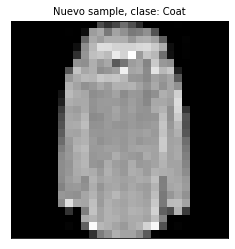

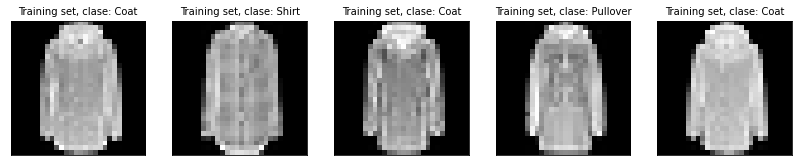

In [ ]:
n=exitos[58] # elijo uno de los exitos 

fig = plt.figure(figsize = (4,4))
plt.imshow(X_test_raw[n], interpolation='none', cmap="gray") # plotea la imagen correspondiente
plt.title("Nuevo sample, clase: {}".format(categories[y_test[n]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
plt.xticks([]) # le saco los ticks en el eje X
plt.yticks([]) # le saco los ticks en el eje Y


knn = clf.kneighbors(X_test[n,:].reshape(1, -1) , return_distance=False)[0] # esto me devuelve los indices de los K samples mas cercanos
fig = plt.figure(figsize = (14,14)) # seteo el tamano de la figura

for n,i in enumerate(knn):
    plt.subplot(1,5,n+1) # Voy a tener una matriz de 1x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(X_train_raw[i], interpolation='none', cmap="gray") # va ploteando los K samples mas cercanos
    plt.title("Training set, clase: {}".format(categories[y_train[i]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()



Repitamos lo mismo pero con fracasos.

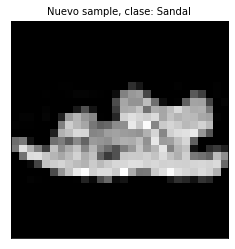

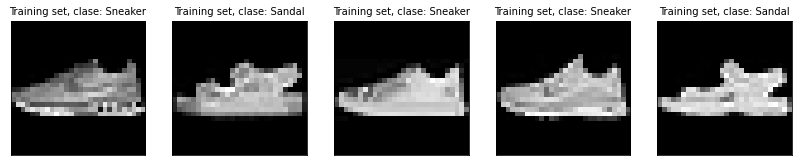

In [ ]:
n=fracasos[1] # elijo uno de los fracasos 

fig = plt.figure(figsize = (4,4))
plt.imshow(X_test_raw[n], interpolation='none', cmap="gray") # plotea la imagen correspondiente
plt.title("Nuevo sample, clase: {}".format(categories[y_test[n]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
plt.xticks([]) # le saco los ticks en el eje X
plt.yticks([]) # le saco los ticks en el eje Y


knn = clf.kneighbors(X_test[n,:].reshape(1, -1) , return_distance=False)[0] # esto me devuelve los indices de los K samples mas cercanos
fig = plt.figure(figsize = (14,14)) # seteo el tamano de la figura

for n,i in enumerate(knn):
    plt.subplot(1,5,n+1) # Voy a tener una matriz de 1x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(X_train_raw[i], interpolation='none', cmap="gray") # va ploteando los K samples mas cercanos
    plt.title("Training set, clase: {}".format(categories[y_train[i]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()



# Para llevarse de este notebook

Podemos implementar muy facilmente un clasificador basado en instancias con scikit-learn y predecir la etiqueta de nuevos ejemplos:


```
clf = KNeighborsClassifier(n_neighbors=5) 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_KNN) 
```

Este clasificador tiene la desventaja de no estimar parametros para construir un modelo (no hay entrenamiento) y por lo tanto, es lento a la hora de evaluar nuevos samples.

Tiene varias ventajas, una de ellas es que nos permite entender por que tomo la decision visualizando los K ejemplos en los cuales se voto la etiqueta final:

```
knn = clf.kneighbors(sample , return_distance=False)[0]
```

(devuelve los K mas cercanos a sample)


# Para hacer


1.   Probar con los distintos parametros del clasificador KNN y ver como cambia la performance. En particular, variar el valor de K.
2.   ¿Hizo falta hacer one-hot encoding de las etiquetas? ¿Por que?
3.   ¿Se te ocurre como aumentar la performance del clasificador?



